> " Let’s start by demystifying one thing: players are no more than numbers. Although EA Works hard to make us believe the players have unique identities, here’s the truth: they’re mere numbers and should be analysed as such. We do know this isn’t quite easy to accept for people who have experienced unique moments that once connected them emotionally to the players. Deep down it’s good to believe they’re something more than numbers, but doing that is just avoiding the truth, sadly. " - [Source](https://www.fifauteam.com/choose-players-fifa-20-ultimate-team/#Attributes)

<img src="imgs/attrs.png"/>

# Dataset

-    Every player available in FIFA 20
-    100+ attributes
-    URL of the scraped player
-    Player positions, with the role in the club and in the national team
-    Player attributes with statistics as Attacking, Skills, Defense, Mentality, GK Skills, etc.
-    Player personal data like Nationality, Club, DateOfBirth, Wage, Salary, etc.


# Links

- [FIFA 20 Player attributes](https://www.fifauteam.com/fifa-20-attributes-guide/)
- [Slides](https://sites.google.com/view/aprendizaje-no-supervisado/)
- [Data source - sofifa page](https://sofifa.com/)
- [Some cool explorations on the FIFA18 dataset. No code](https://github.com/4m4n5/fifa18-all-player-statistics)
- [Cool exploration FIFA18 WITH CODE](https://github.com/YarkoKhamar/DAProject/blob/master/ExploratoryAnalysis.ipynb)

# Introduction

En esta notebook se encuentran aplicados conceptos de embeddings (SNE y PCA) al dataset de FIFA2020.

Después de cada aplicación hay una breve observación de los resultados obtenidos y qué posibilidades ofrece esta notebook como un punto de partida para próximas exploraciones con el mismo dataset.

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

In [2]:
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns

In [78]:
df=pd.read_csv("players_20.csv")
df.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,18278.000000,1.698000e+04,18038.000000,18038.000000,1126.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,2.368038,4.740717e+06,20.103892,2021.114591,12.114565,67.700899,52.298301,57.233777,62.531585,51.553503,64.876678,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754,49.718405,45.590218,52.221468,58.748003,42.809388,55.596509,47.325692,42.708885,52.768848,58.461976,64.299923,64.415746,63.504924,61.752544,63.856439,58.181694,64.928165,62.889485,65.234763,46.812945,55.742149,46.380239,50.072163,53.609749,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,0.765038,1.103002e+07,16.603639,1.289888,6.735922,11.297656,14.029418,10.407844,10.284950,16.419528,9.760162,7.736278,7.244023,7.510709,8.154062,10.634038,8.447876,18.325403,19.594609,17.428429,14.679653,17.701815,18.929118,18.422991,17.433612,15.246454,16.741878,15.042232,14.847763,14.808380,9.135613,14.201559,13.326083,11.934059,16.017954,12.534811,19.322343,17.318157,20.775812,19.594022,13.955626,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.300000e+04,1.000000,2019.000000,1.000000,24.000000,15.000000,24.000000,23.000000,15.000000,27.000000,44.000000,42.000000,35.000000,45.000000,12.000000,41.000000,5.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,8.000000,5.000000,12.000000,11.000000,11.000000,21.000000,12.000000,14.000000,19.000000,12.000000,20.000000,4.000000,9.000000,3.000000,2.000000,9.000000,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,5.630000e+05,9.000000,2020.000000,6.000000,61.000000,42.000000,50.000000,57.000000,36.000000,59.000000,60.000000,58.000000,57.000000,60.750000,29.000000,58.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,34.000000,31.000000,43.000000,54.000000,56.000000,57.

Para realizar sne elegimos aquellas features que presentaban distribuciones complejas al analizarlas en la notebook exploration_of_data.ipynb y que no podíamos explicarlas por la diferencia GK/No GK.

In [83]:
n_sne=2000 #elegir numero pequeño para agilidad en el cálculo luego
df_sne=df.loc[:n_sne]
skills_ratings = ["mentality_interceptions","mentality_penalties","mentality_positioning","overall",
                  "potential","age","defending_marking","power_stamina","mentality_aggression","attacking_finishing",
                  "movement_acceleration","movement_sprint_speed","movement_agility","skill_curve"]

X=df_sne[skills_ratings]
print('dimensión del espacio de los datos: ', len(skills_ratings))

dimensión del espacio de los datos:  14


In [84]:
from sklearn import (manifold, decomposition)

import time
time_start = time.time()

tsne = manifold.TSNE(n_components=2, verbose=1,perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2001 samples in 0.005s...
[t-SNE] Computed neighbors for 2001 samples in 0.109s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2001
[t-SNE] Computed conditional probabilities for sample 2000 / 2001
[t-SNE] Computed conditional probabilities for sample 2001 / 2001
[t-SNE] Mean sigma: 8.854333
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.717339
[t-SNE] KL divergence after 1000 iterations: 1.256657
t-SNE done! Time elapsed: 6.203075885772705 seconds


In [43]:
data=[]
bool_crack=df_sne["overall"] > 85 #diferenciamos a los mejores jugadores

#graficamos los datos en el espacio transformado: las dos componentes tsne

graf1 = go.Scatter(x=X_tsne[:,0], y=X_tsne[:,1],
                           mode='markers',
                        text=df_sne.loc[:,'player_positions'], #'Height', 'Weight', 'Club', 'Age', 'Name','Position'
                           marker=dict(
                                size=5)
                           )

crack =go.Scatter(x=X_tsne[bool_crack,0], y=X_tsne[bool_crack,1],name='Los más mejores',
                      text=df_sne.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[graf1,crack]

layout = go.Layout(title="Visualización de la base en el espacio tsne",titlefont=dict(size=20),
                xaxis=dict(title='componente 1'),
                yaxis=dict(title='componente 2'),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)
#plot(fig)

En esta versión del dataset, las posiciones de cada jugador son un string de la lista de posiciones. Sanitizamos:

In [45]:
def sanitize_player_positions(df):
        df["player_positions"]=df.player_positions.apply(lambda x: x.split(","))
sanitize_player_positions(df_sne)

In [50]:
goalkeepers=['GK']
forwards = ["ST","LF","CF","RF","LW","RW"]
midfielders=["LM","CAM","CM","RM"]
defenders=["LWB","LB","CB","CDM","RB","RWB"]

inverse_position_map = {
    "goalkeepers":0,
    "forwards":1,
    "midfielders":2,
    "defenders":3
}
position_map = {0:"Goalkeeper",
                1:"Forward",
                2:"Midfielder",
                3:"Defender"}

def pos2(position_list):
    res = [0,0,0,0]
    for x in position_list:
        #print(x)
        if x in goalkeepers:
            res[inverse_position_map["goalkeepers"]]+=1
        elif x in forwards:
            res[inverse_position_map["forwards"]]+=1
        elif x in midfielders:
            res[inverse_position_map["midfielders"]]+=1
        elif x in defenders:
            res[inverse_position_map["defenders"]]+=1
    try:
        position = position_map[res.index(max(res))]
        return position
    except:
        return 'nan'

In [51]:
df_sne["Position2"]=df_sne["player_positions"].apply(lambda x: pos2(x))

df_sne["Position2"].value_counts()

Defender      763
Midfielder    613
Forward       419
Goalkeeper    206
Name: Position2, dtype: int64

In [52]:
bool_striker= df_sne["Position2"] == 'Forward'
bool_midfielder= df_sne["Position2"] == 'Midfielder'
bool_defender= df_sne["Position2"] == 'Defender'
bool_gk= df_sne["Position2"] == 'GK'

bool_crack=df_sne["overall"] > 85

palette=['navy','red','#A2D5F2','orange','green','pink']  
data=[]

striker =go.Scatter(x=X_tsne[bool_striker,0], y=X_tsne[bool_striker,1],name='Striker',
                      text=df_sne.loc[bool_striker,'short_name'],
                      opacity=0.9,marker=dict(color=palette[2],size=5),mode='markers')

midfielder =go.Scatter(x=X_tsne[bool_midfielder,0], y=X_tsne[bool_midfielder,1],name='Midfielder',
                      text=df_sne.loc[bool_midfielder,'short_name'],
                      opacity=0.6,marker=dict(color=palette[1],size=5),mode='markers')

defender =go.Scatter(x=X_tsne[bool_defender,0], y=X_tsne[bool_defender,1],name='Defender',
                      text=df_sne.loc[bool_defender,'short_name'],
                      opacity=0.7,marker=dict(color=palette[3],size=5),mode='markers')

gk =go.Scatter(x=X_tsne[bool_gk,0], y=X_tsne[bool_gk,1],name='GK',
                      text=df_sne.loc[bool_gk,'short_name'],
                      opacity=0.4,marker=dict(color=palette[4],size=5),mode='markers')

crack =go.Scatter(x=X_tsne[bool_crack,0], y=X_tsne[bool_crack,1],name='Top player',
                      text=df_sne.loc[bool_crack,'short_name'],textfont=dict(family='sans serif',color='black',size=16),
                      opacity=0.9,mode='text')

data=[striker,midfielder,defender,gk,crack]

layout = go.Layout(title="t-SNE - Fifa Players",titlefont=dict(size=20),
                autosize=False, width=1150,height=1150)

fig = go.Figure(data=data, layout=layout)

iplot(fig)
#plot(fig)

Vemos que quedaron distribuidos a lo largo del eje Y los defensores, de los MD de los atacantes.

Los strikers quedan un poco mezclados respecto a los midfielders todavía, así que este análisis se puede refinar más.

In [90]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [91]:
#pca.explained_variance_ratio_
print(pca.n_components_)
pca_X = pca.transform(X)
#para hacer un scatterplot después
principal_df = pd.DataFrame(data = pca_X,columns = ['principal component 1', 'principal component 2']) 

2


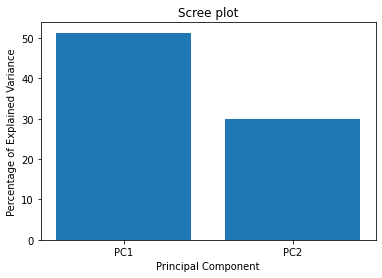

In [92]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1,len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree plot')
plt.show()

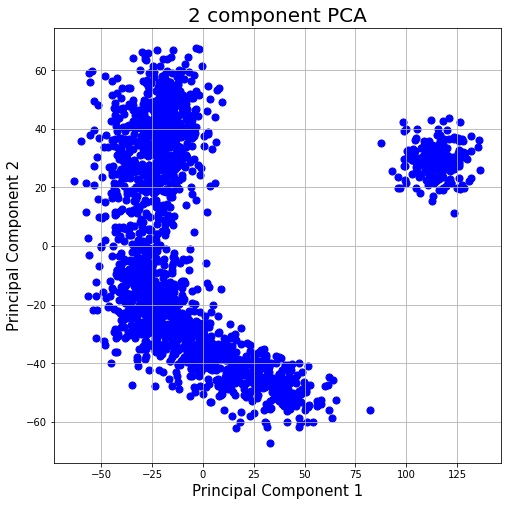

In [93]:
fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(principal_df[ 'principal component 1']
               , principal_df['principal component 2']
               , c = 'b'
               , s = 50)
ax.grid()

Vemos dos clusters ampliamente separados, sugiriendo que los samples de ambos clusters difieren.

Veamos cómo contribuyeron las features a la hora de separar los clusters

In [94]:
loading_scores = pd.Series(pca.components_[0])
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
top_10 = sorted_loading_scores[0:10].index.values
loading_scores[top_10]

2    -0.457875
13   -0.421495
9    -0.421379
1    -0.322993
7    -0.279157
10   -0.226156
12   -0.222987
11   -0.210131
8    -0.207090
6    -0.188783
dtype: float64

Vemos que las primeras 4 features contribuyeron más que el resto a la hora de separar los datos.

Es decir, hay features que se destacan, y no es la situación que hayan varias que contribuyen de igual forma.